## <div style="text-align: center; color: green;">Project Title: Term Deposit Prediction</div>

### <div style="color: gray;">Step 1: Dataset Overview-</div>

#### <div style="color: green;">Import necessary libraries:</div>

In [1]:
# Import the numerical algebra libs
import pandas as pd
import numpy as np

# Import visualization libs
import seaborn as sns
import matplotlib.pyplot as plt

# Import score libs
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score 

import warnings
warnings.filterwarnings('ignore')

#### <div style="color: green;">Load Dataset:</div>

In [2]:
data = pd.read_csv('bank_data.csv')
data.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


#### Observation:
It looks like the data in CSV file isn't correctly formatted, as the rows and columns are not aligned properly. So, first I need to work on correctly formatted the data.

#### <div style="color: green;">Correctly Formatted Dataset:</div>


In [3]:
# Load the dataset with the correct delimiter
data = pd.read_csv('bank_data.csv', delimiter=';')

# Display the first few rows to verify
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [4]:
data.to_csv('cleaned_file.csv', index=False)

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### <div style="color: green;">Dataset description:</div>

The dataset contains 41,188 rows and 21 columns. Here's an overview:

- **Columns:**
  - **age:** Integer, the age of the client.
  - **job:** Categorical, type of job (e.g., admin., services, etc.).
  - **marital:** Categorical, marital status (e.g., married, single, etc.).
  - **education:** Categorical, educational background (e.g., high school, university degree).
  - **default:** Categorical, whether the client has credit in default (yes/no).
  - **housing:** Categorical, whether the client has a housing loan (yes/no).
  - **loan:** Categorical, whether the client has a personal loan (yes/no).
  - **contact:** Categorical, contact communication type (e.g., cellular, telephone).
  - **month:** Categorical, last contact month of the year.
  - **day_of_week:** Categorical, last contact day of the week.
  - **duration:** Integer, the last contact duration (in seconds).
  - **campaign:** Integer, number of contacts performed during this campaign.
  - **pdays:** Integer, number of days since the client was last contacted from a previous campaign.
  - **previous:** Integer, number of contacts performed before this campaign.
  - **poutcome:** Categorical, outcome of the previous marketing campaign (e.g., success, failure).
  - **emp.var.rate:** Float, employment variation rate (indicator for the economy).
  - **cons.price.idx:** Float, consumer price index.
  - **cons.conf.idx:** Float, consumer confidence index.
  - **euribor3m:** Float, 3-month Euribor rate.
  - **nr.employed:** Float, number of employees.
  - **y:** Categorical, the target variable (whether the client subscribed to a term deposit, yes/no).

This dataset contains a mix of numerical and categorical features. The target variable is the column y, indicating whether the client subscribed to a term deposit (yes or no).

### <div style="color: gray;">Step 2: Data Exploration and Preprocessing-</div>

#### <div style="color: green;"> Visualize Dataset:</div>

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
data.shape

(41188, 21)

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


#### <div style="color: green;">Data Info:</div>

In [9]:
data.describe(include='object').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### <div style="color: green;"> Encode Variable:</div>

**`1. LabelEncoding for target variable:`**

In [12]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

data["y"] = LabelEncoder().fit_transform(data["y"])
data["y"]

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [13]:
data["y"].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

**`2. Encoding for categorical variable:`**

In [14]:
# select columns of type 'object'

data.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [15]:
#Encode object data types

label_encoder = LabelEncoder()

# List of object data type columns
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Apply LabelEncoder to each column
for col in cols:
    data[col] = label_encoder.fit_transform(data[col])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### <div style="color: green;"> Exploratory Data Analysis (EDA):</div>

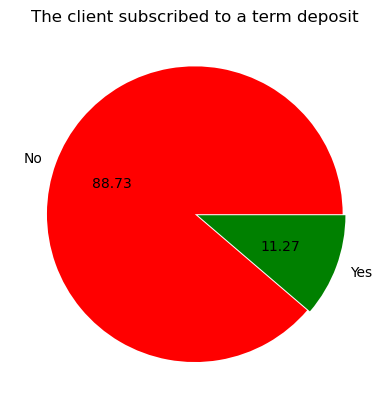

In [17]:
#Target Variable Distribution using pyplot

import matplotlib.pyplot as plt
plt.pie(data['y'].value_counts(), labels=['No', 'Yes'],autopct='%0.2f', explode=(0, 0.02), colors=['red', 'green'])
plt.title('The client subscribed to a term deposit')
plt.show()

#### Observations:
In above observation 88.73% cases the client don't subscribed to a term deposit and only 11.27% cases the client subscribed to a term deposit. The data is fully unbalanced.

#### <div style="color: green;"> Correlation Matrix Analysis:</div>

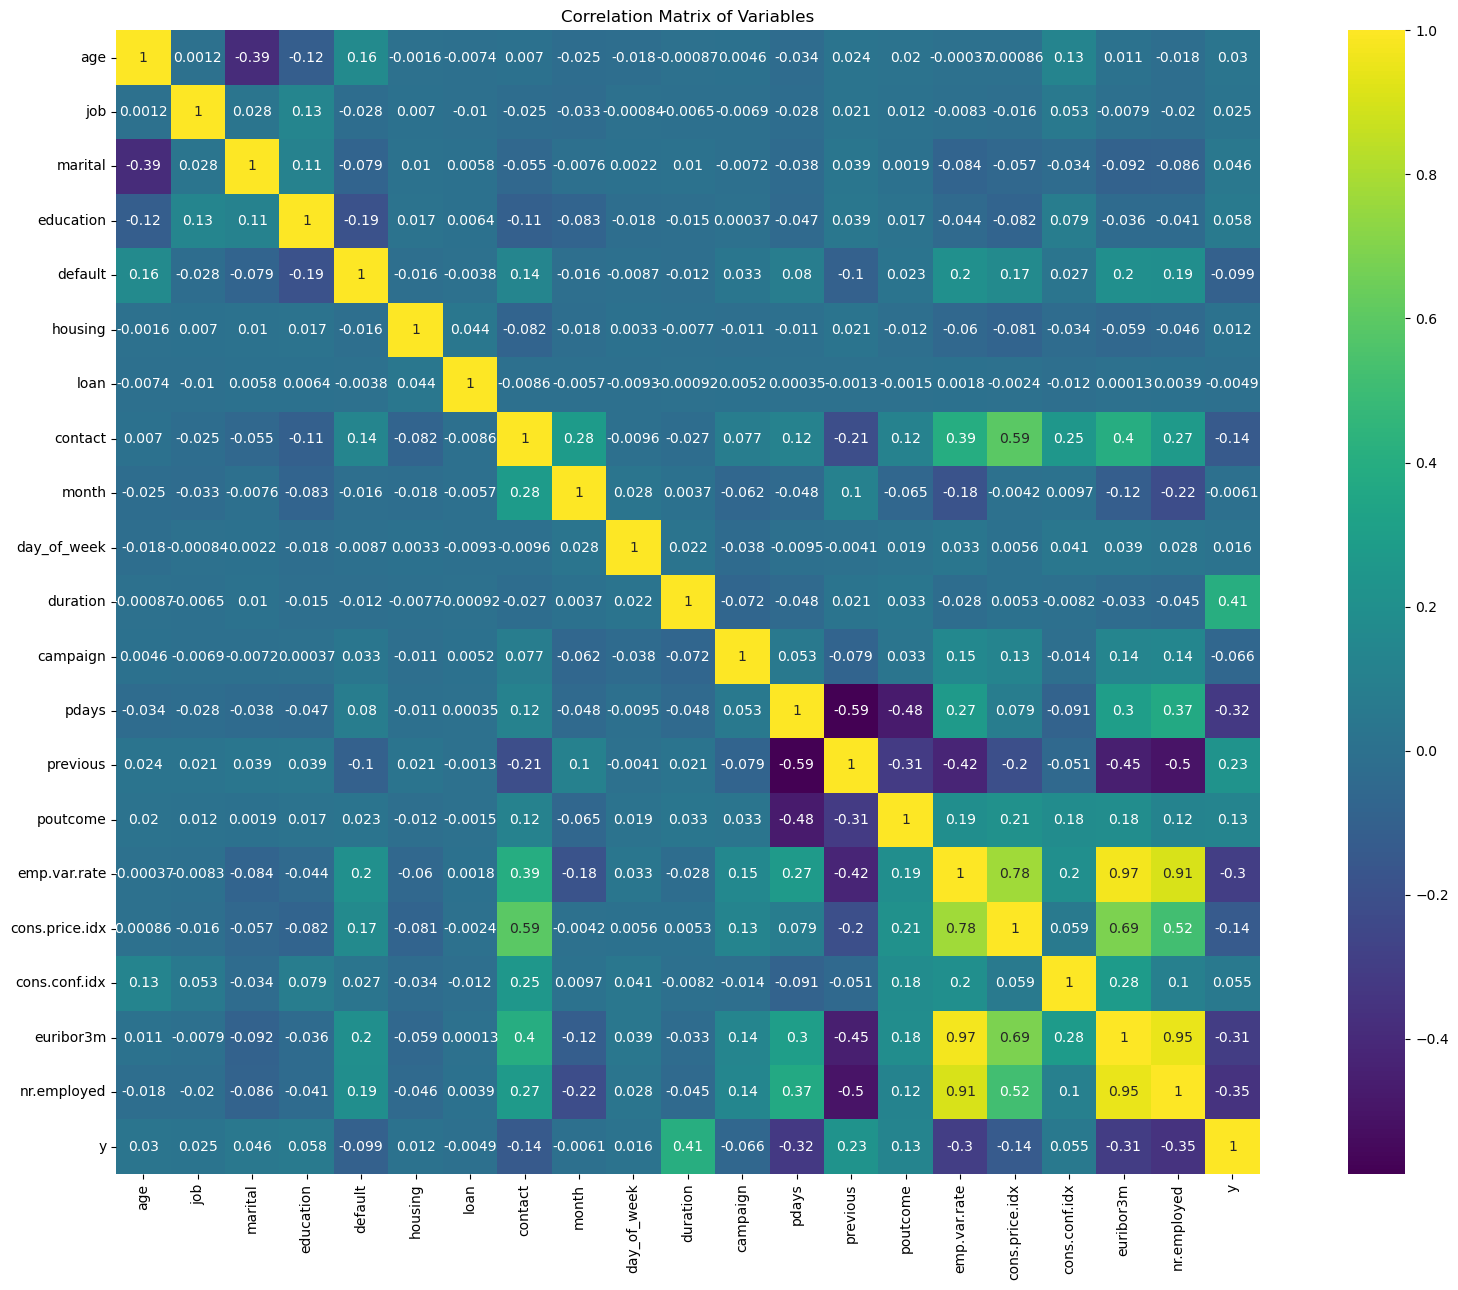

In [18]:
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(18, 13))
sns.heatmap(numeric_data.corr(), square=True,annot = True,cmap="viridis")
plt.xticks(rotation=90)
plt.yticks()
plt.title('Correlation Matrix of Variables')
plt.tight_layout()
plt.show()

#### Observations:

- Many variables show low correlations (close to 0) with each other, indicating that they are largely independent. Examples are **job**, **marital**, **education**, **default**, **housing**, etc.

- Variables such as **marital** and **age** seem to have a negative correlation (-0.39). This could indicate that as **age** increases, certain **marital** categories decrease (possibly widowed, single, etc.).

- Some features show relatively stronger correlations with each other. For instance, **emp.var.rate**, **cons.price.idx**, **cons.conf.idx**, and **euribor3m** have moderate to strong correlations with each other (around 0.6 to 0.9). This indicates that these economic indicators may move in a similar direction.

- The target variable (**y**) shows weak correlations with most features. However, there may be a few exceptions where certain features (such as euribor3m or nr.employed) have slightly higher correlations.

- **nr.employed** has a strong negative correlation with **y** (-0.35), which could indicate that customers who had a certain outcome in a previous campaign are less likely to subscribe again.

- Features such as **emp.var.rate**, **cons.price.idx**, and **euribor3m** may play a significant role in influencing the likelihood of a term deposit being subscribed to, given their correlations with each other and the target variable.

#### <div style="color: green;"> Histogram Analysis:</div>

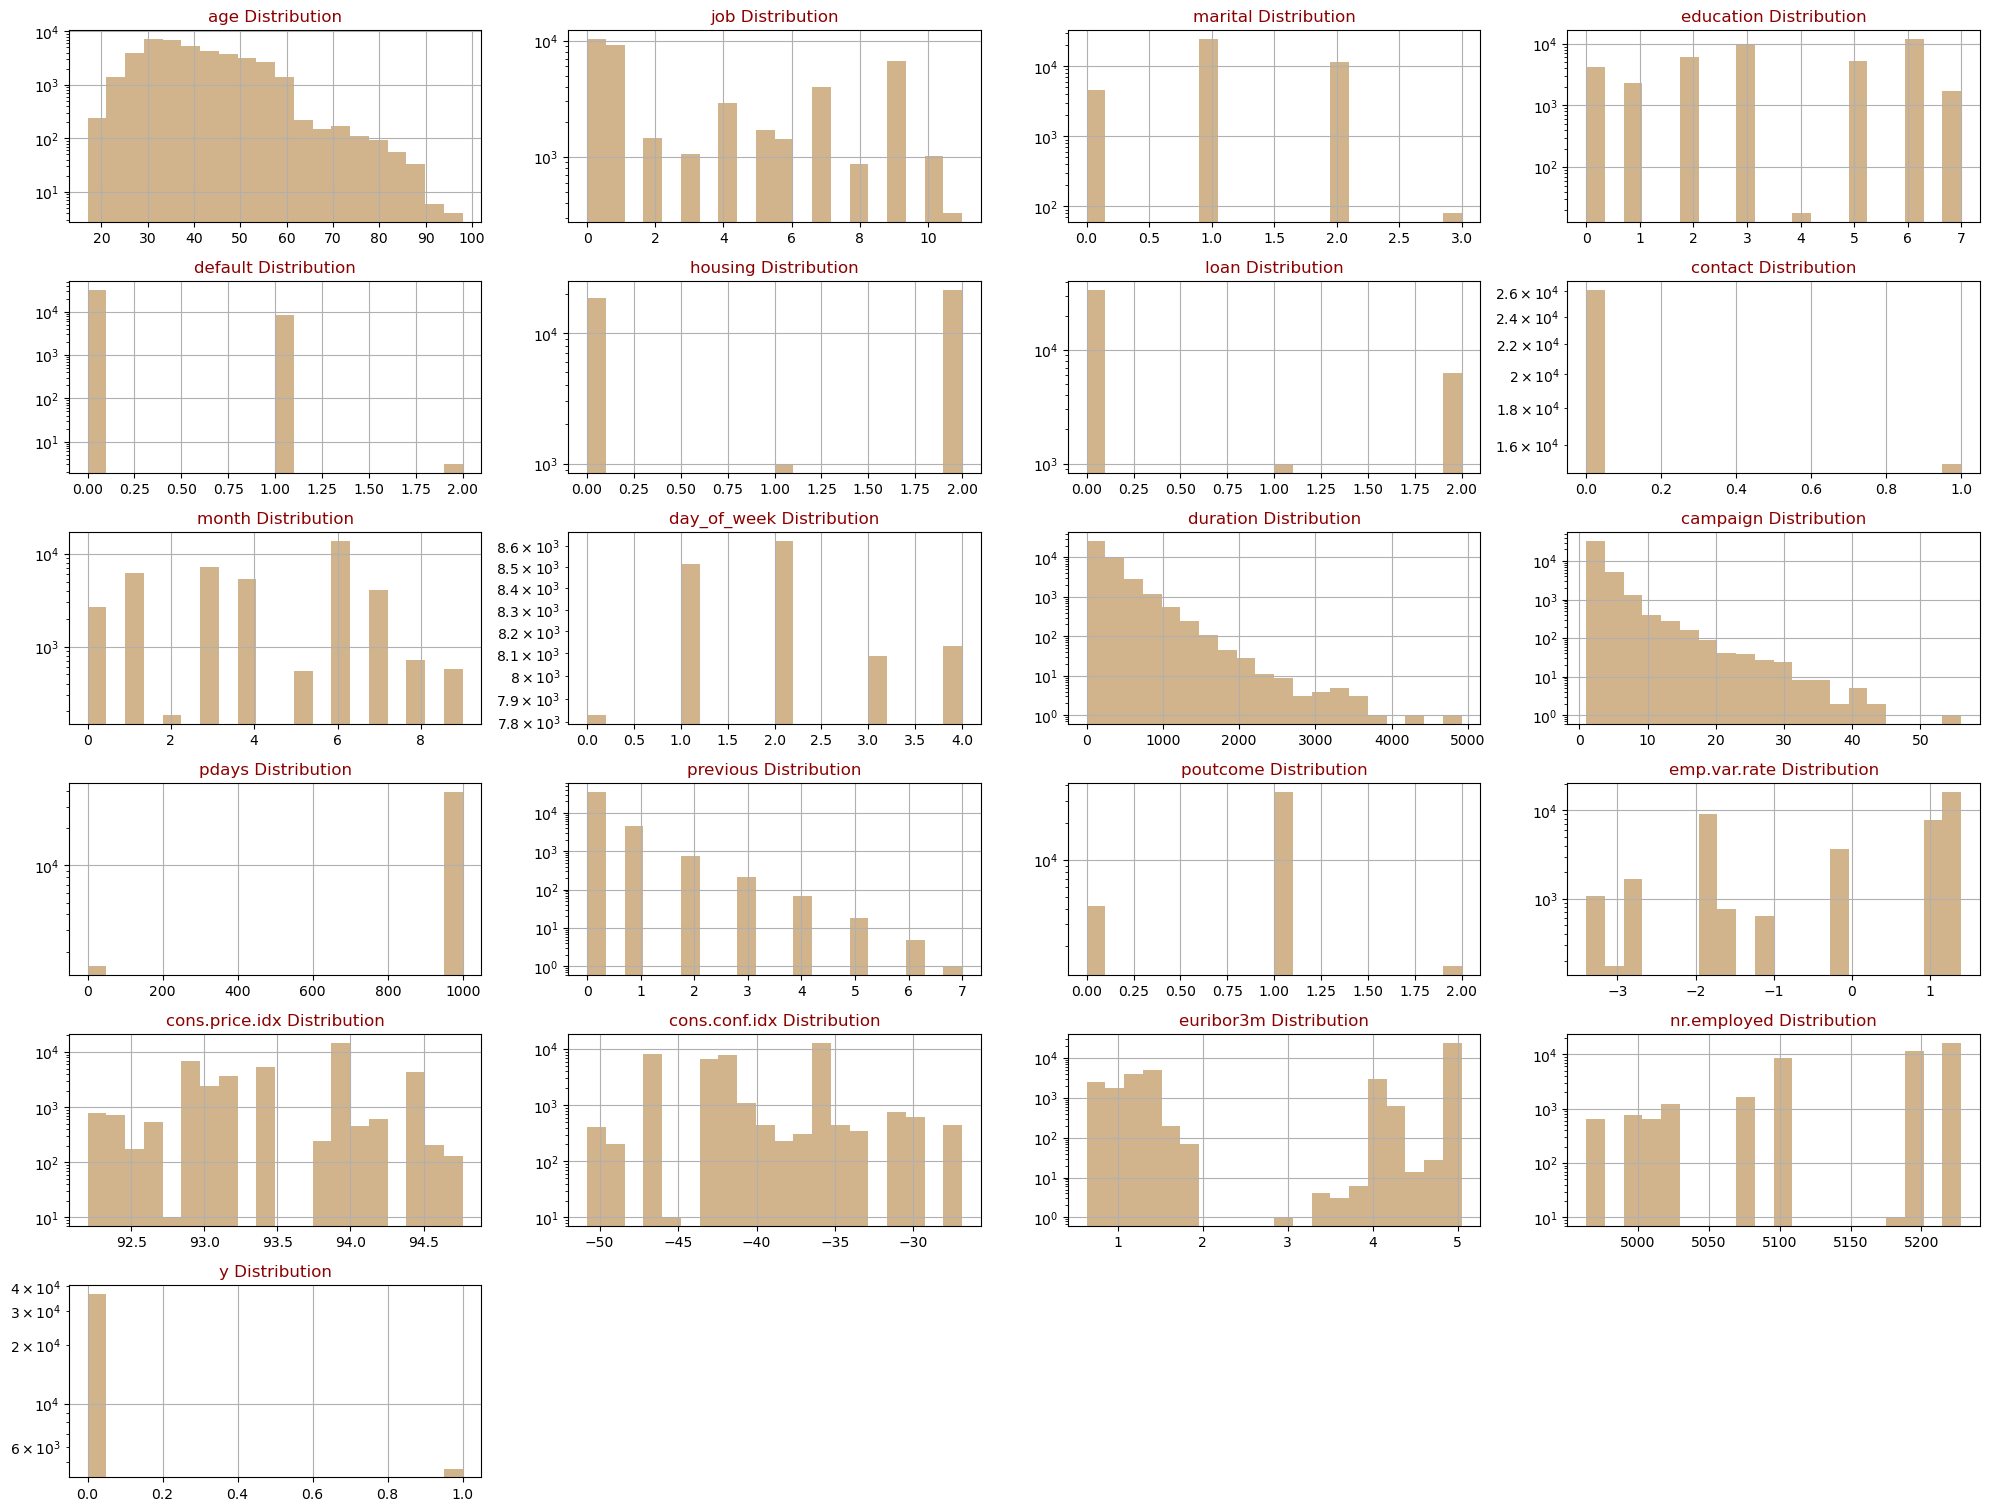

In [19]:
def draw_histograms(dataframe, features, rows, cols):
    colors = ['tan']
    
    fig = plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        dataframe[feature].hist(bins=20, ax=ax, facecolor=colors[i % len(colors)])
        ax.set_title(feature + " Distribution", color='DarkRed')
        ax.set_yscale('log')  # Set y-axis to a logarithmic scale for better visibility
    fig.tight_layout()  
    plt.show()

# Plot histograms for all columns in the dataset in an 8x4 grid with different colors for each plot
draw_histograms(data, data.columns, 8, 4)

#### Observations:

- **Age Distribution:** The majority of clients fall between the ages of 20 and 60, with a peak around the 30-40 age range. Fewer clients are in the higher age brackets (70+).

- **Job Distribution:** The dataset seems to have several job categories, with noticeable concentrations in specific job types. Some categories are significantly more populated than others.

- **Marital Status Distribution:** There is a fairly even spread between different marital statuses, with a possible majority in the "married" group.

- **Education Distribution:** The education levels show that most clients fall within a certain range of categories. The dataset is not evenly distributed, indicating that certain educational backgrounds are more common.

- **Default Distribution:** The overwhelming majority of values are centered around zero, suggesting that most clients have not defaulted.

- **Housing Loan Distribution:** Most clients appear to have housing loans, with a small segment without one.

- **Personal Loan Distribution:** The majority of clients do not have a personal loan.

- **Contact Distribution:** The contact method is imbalanced, suggesting one method is predominantly used.

- **Day of Week/Month Distribution:** There are clear peaks in certain days of the week and months for contacting clients, possibly due to marketing strategies.

- **Duration Distribution:** The duration of calls is heavily right-skewed, with most calls being short but a few lasting much longer.

- **Pdays Distribution:** This shows an unusual spike at the maximum value, indicating many clients haven’t been contacted in the past.

- **Campaign Distribution:** The number of contacts per campaign is concentrated in the lower ranges, suggesting most clients are contacted only a few times.

- **Previous Campaign Outcome (Poutcome) Distribution:** The majority of clients likely had an unknown or unsuccessful outcome in previous campaigns.

- **Consumer Price Index (CPI):** CPI appears normally distributed within a certain range, without extreme outliers.

- **Employment Variation Rate (emp.var.rate):** This economic indicator fluctuates but has distinct peaks, suggesting varying economic conditions during the data collection period.

- **Number of Employees (nr.employed):** Most clients fall within specific employment rates, with clear peaks at certain values.

- **Subscription to Term Deposit (y Distribution):** There seems to be a significant imbalance, with many clients not subscribing to a term deposit, likely indicating class imbalance in the target variable.

#### <div style="color: green;"> KDE Plot Analysis:</div>

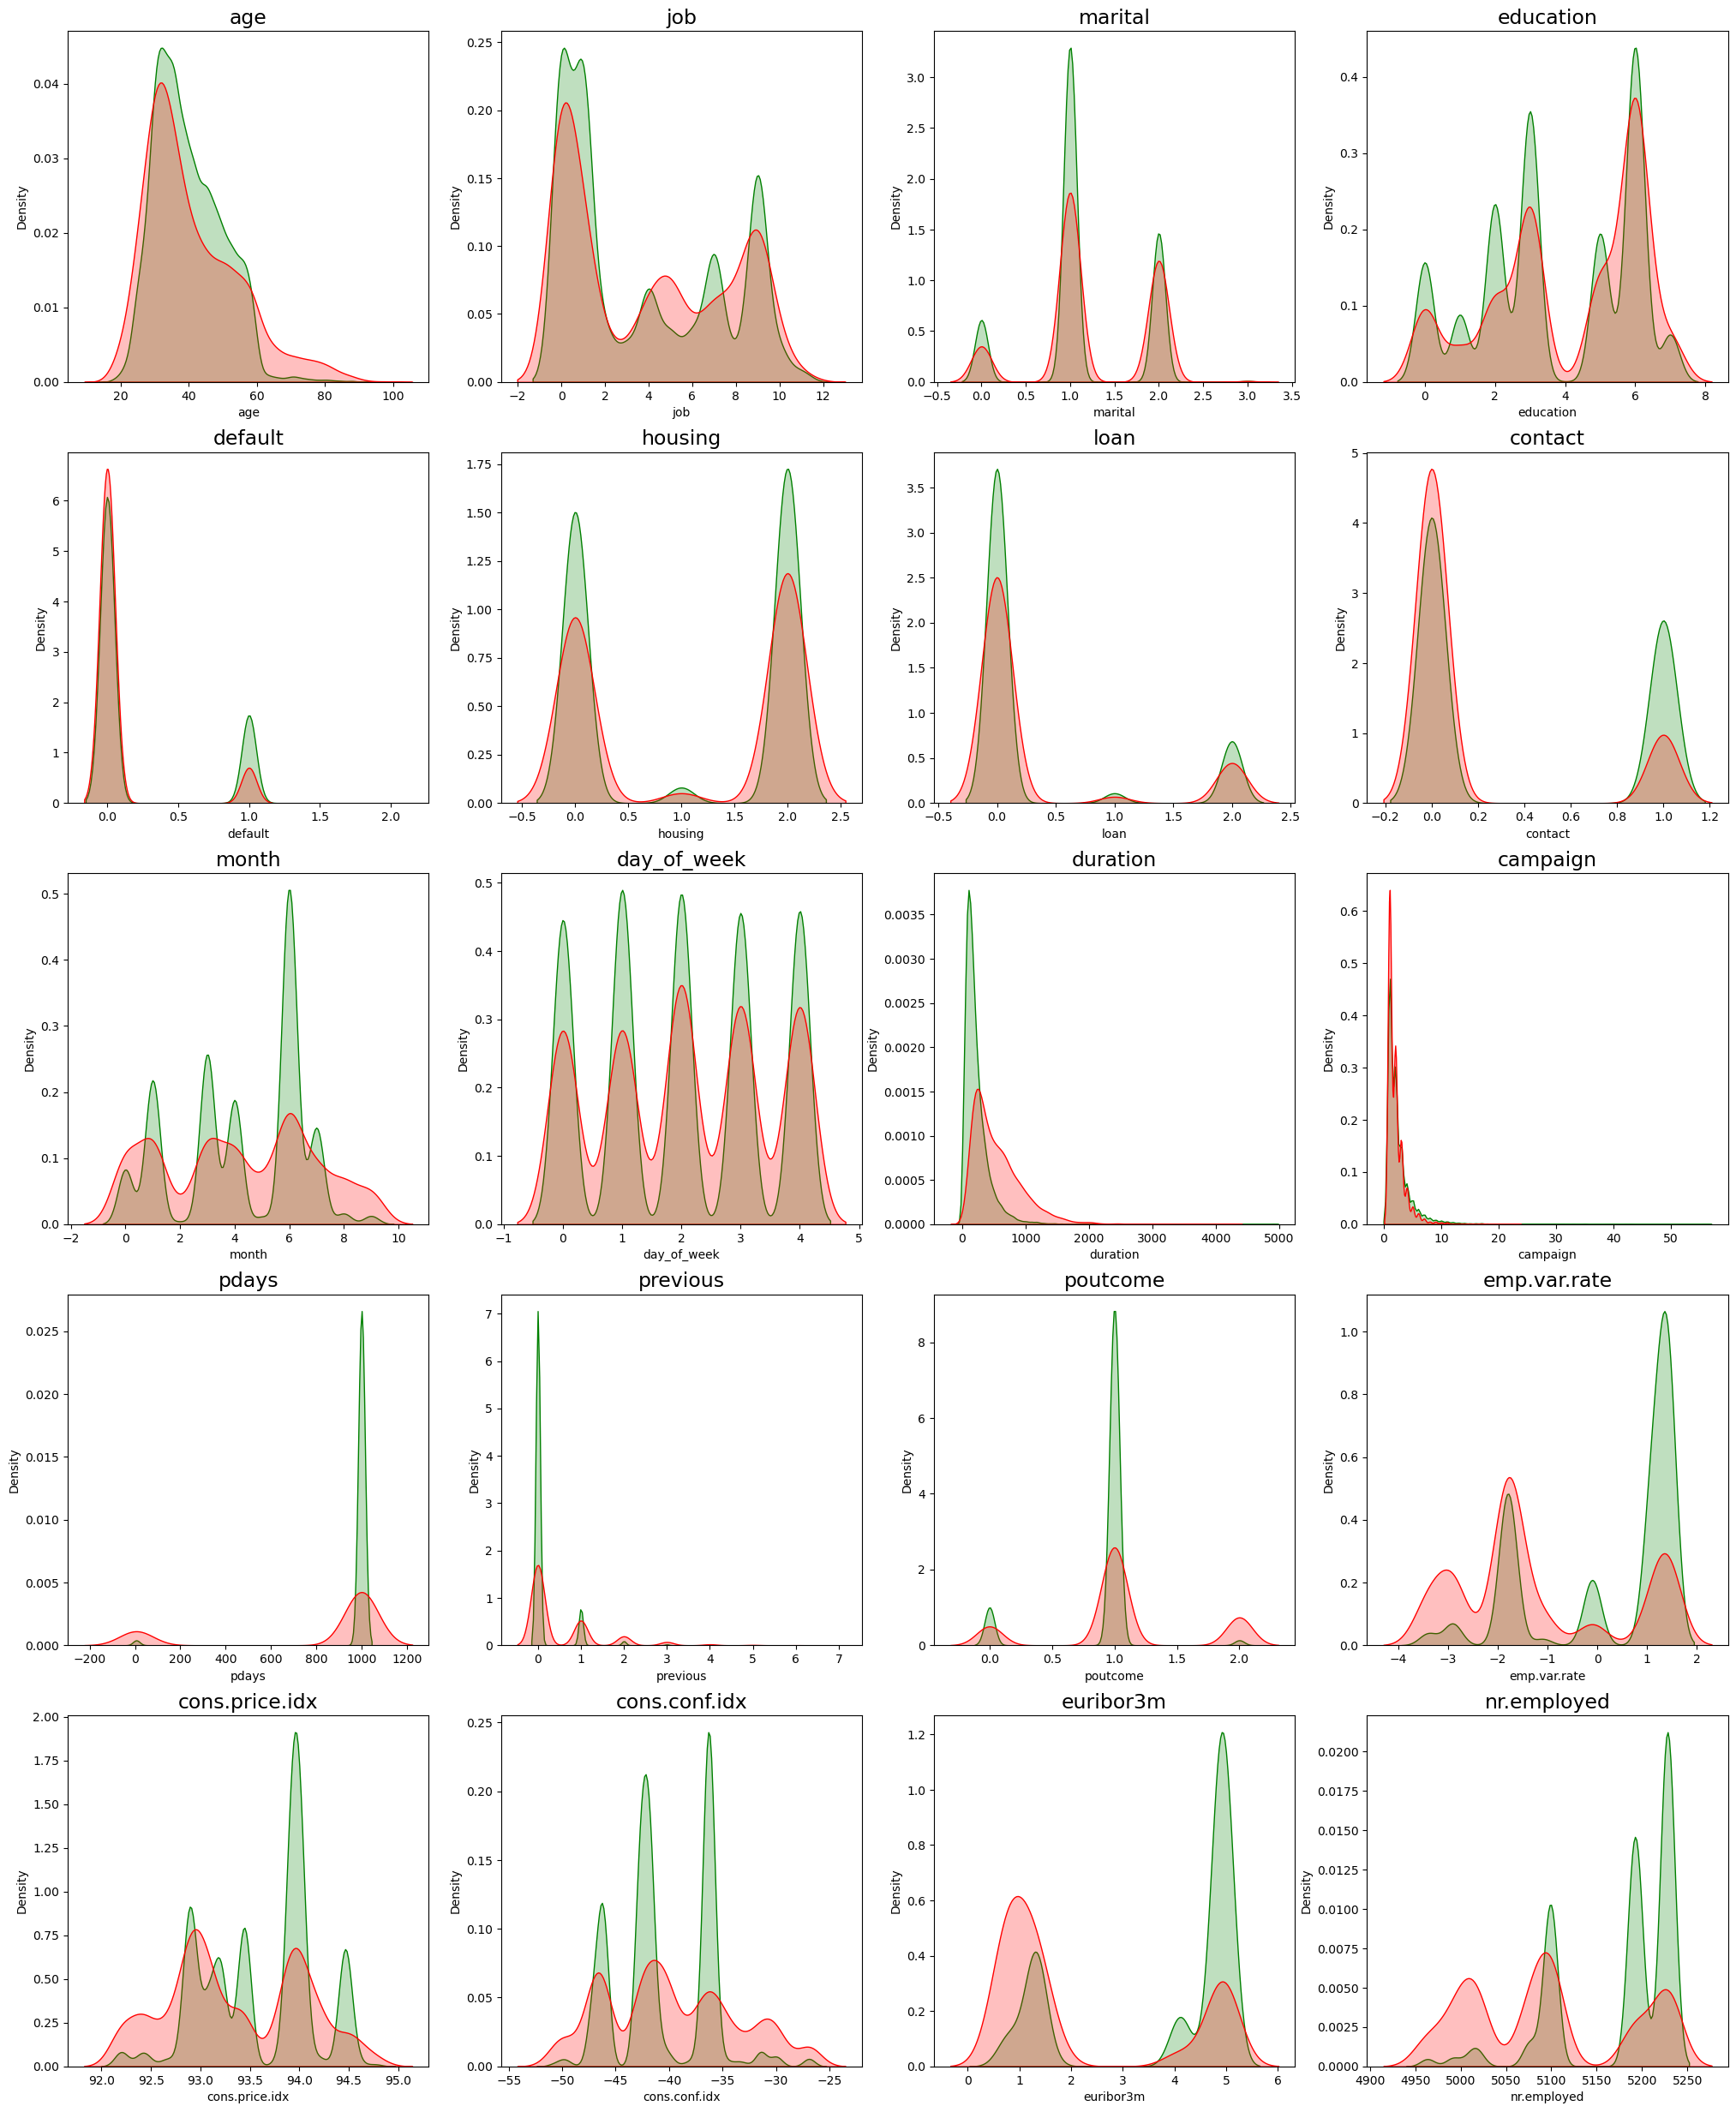

In [20]:
Subscribed_to_a_term_deposit = data['y'] == 1
No_subscribed_to_a_term_deposit = data['y'] == 0

x = data.drop(['y'], axis = 1)
cols = list(x.columns.values)

plt.figure(figsize=(25,50))
for n , col in enumerate(cols):
    plt.subplot(8,4,n+1)
    sns.kdeplot(x[No_subscribed_to_a_term_deposit][col], color= 'green', fill=True)
    sns.kdeplot(x[Subscribed_to_a_term_deposit][col], color= 'red', fill=True)
    plt.title(col, fontsize= 17)
plt.show()

#### <div style="color: green;"> Distribution of independent variables:</div>

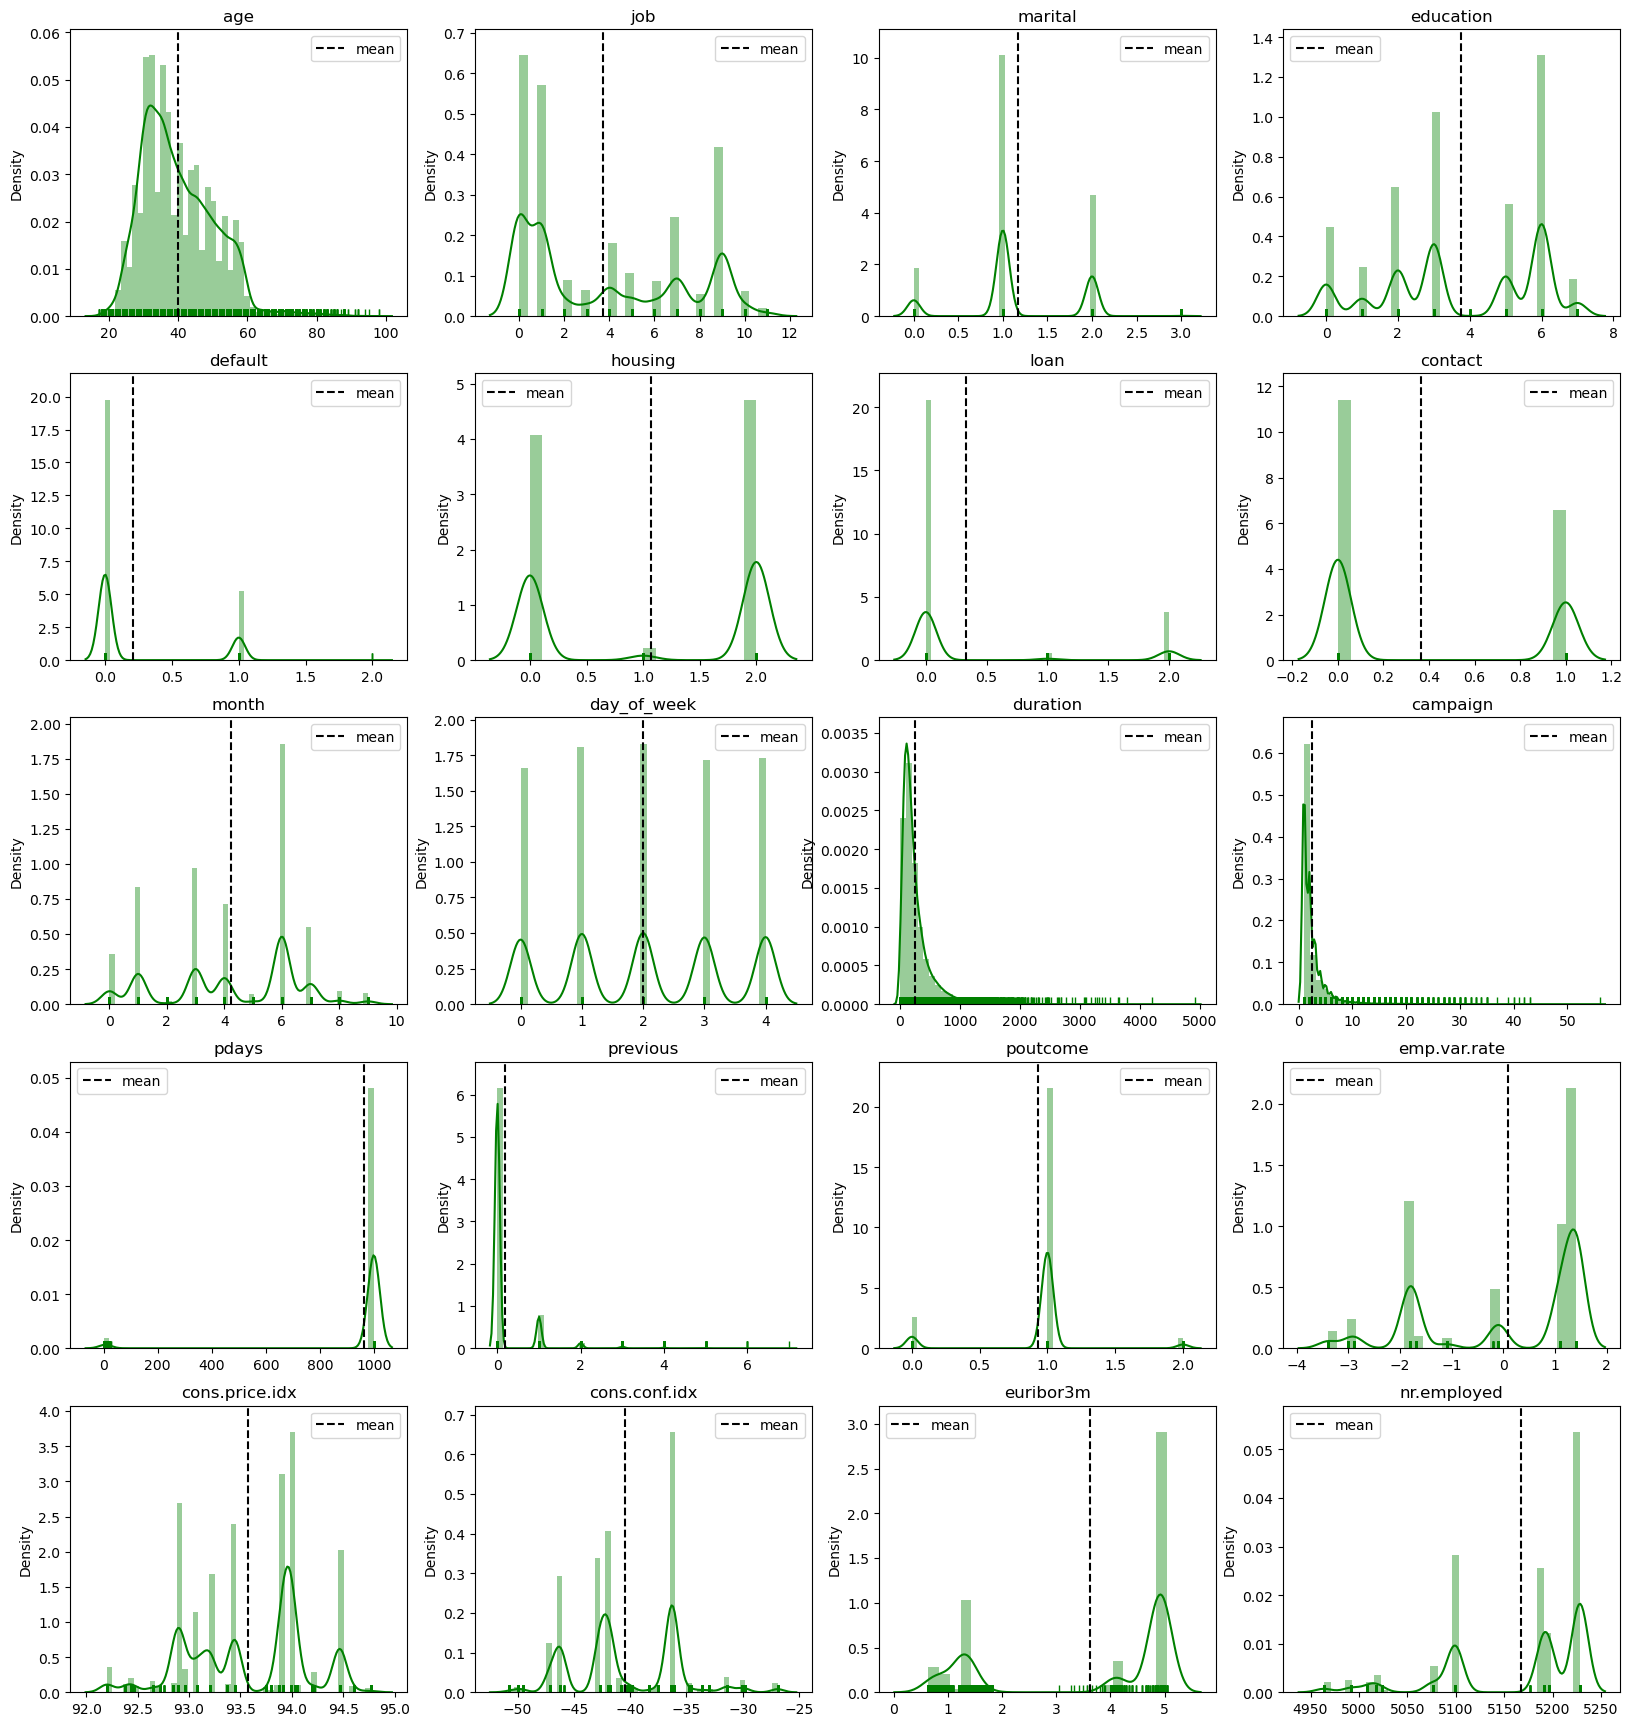

In [21]:
import itertools

cols = [i for i in data.columns if i != 'y']

fig = plt.figure(figsize=(20, 35))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(8,4,j+1)
    ax = sns.distplot(data[i],color='green',rug=True)
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

#### <div style="color: green;"> Distribution of dependent variable:</div>

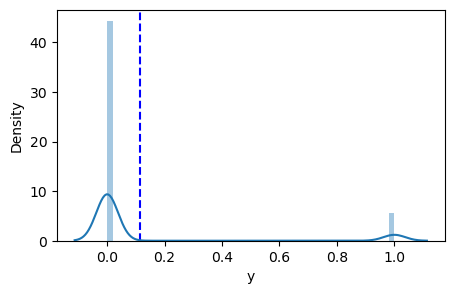

In [22]:
fig = plt.figure(figsize=(5, 3))
plt.axvline(data.y.mean(),linestyle="dashed",label="mean", color='blue')
sns.distplot(data.y);

#### <div style="color: green;"> Correlation of target variable with features:</div>

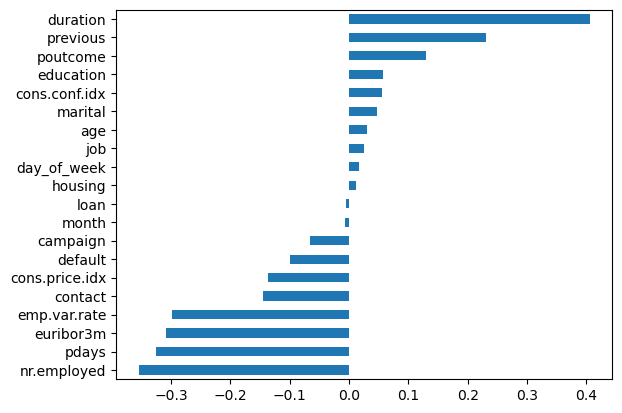

In [23]:
# Correlation of target variable with features after numerical transformation 

numerical_data = data.select_dtypes(include=[np.number])
correlation_series = numerical_data.corr()['y'][:-1].sort_values()
correlation_series.plot.barh();

#### Observation:

- **Euribor3m:** This feature has the strongest negative correlation with the target variable, meaning higher euribor rates may be associated with a lower likelihood of term deposit subscription.

- **Number of Employees (nr.employed):** This feature also shows a negative correlation, indicating that more employees in the company are associated with a lower likelihood of subscription.

- **Employment Variation Rate (emp.var.rate):** Similarly, a higher variation rate seems to have a negative impact on term deposit subscription.

- **Consumer Price Index (cons.price.idx):** This feature has a slight negative correlation with the target variable, suggesting that higher CPI values might reduce the likelihood of subscription.

- **Contact and Campaign:** These features have low correlation, indicating a minimal direct relationship with the target.

- **Poutcome:** This feature has the highest positive correlation with the target variable, meaning previous campaign success is positively associated with subscribing to a term deposit.

- **Previous, Pdays:** Both features, related to previous contact during a campaign, have a positive but small correlation with term deposit subscription.

- **Other features (age, job, education, housing):** These features show minimal to low correlation, meaning they may not directly influence the target variable as much as others.Euribor3m: This feature has the strongest negative correlation with the target variable, meaning higher euribor rates may be associated with a lower likelihood of term deposit subscription.

### <div style="color: gray;">Step 3:Model Training and Performance Evaluation-</div> 

#### <div style="color: green;"> Split the dataset into training and testing sets:</div>

In [24]:
# Separate properties and target variable

X = data.drop("y", axis=1)
Y = data.y

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 4, test_size = 0.2)

In [26]:
x_train.shape, y_train.shape

((32950, 20), (32950,))

In [27]:
x_test.shape, y_test.shape

((8238, 20), (8238,))

#### <div style="color: green;"> Normalizing the data:</div>

In [28]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

#### <div style="color: green;"> All Classification Model Training and Evaluation:</div>

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [30]:
svc = SVC()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [31]:
clfs = {
    'SVC' : svc,
    'NB': gnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [32]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    try:
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        return accuracy, precision, recall, f1
    except Exception as e:
        print(f"Error with classifier {clf.__class__.__name__}: {str(e)}")
        return None, None

#### <div style="color: green;">Evaluate Performence:</div>

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,RocCurveDisplay
from termcolor import colored

In [34]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("F1 - ",current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For  SVC
Accuracy -  0.9071376547705754
Precision -  0.655367231638418
Recall -  0.3741935483870968
F1 -  0.4763860369609856
For  NB
Accuracy -  0.8478999757222627
Precision -  0.38521677327647474
Recall -  0.5827956989247312
F1 -  0.46384253316217366
For  DT
Accuracy -  0.9104151493080845
Precision -  0.6170731707317073
Recall -  0.5440860215053763
F1 -  0.5782857142857143
For  LR
Accuracy -  0.9095654285020636
Precision -  0.6648841354723708
Recall -  0.4010752688172043
F1 -  0.500335345405768
For  RF
Accuracy -  0.9106579266812334
Precision -  0.6422287390029325
Recall -  0.47096774193548385
F1 -  0.5434243176178659
For  AdaBoost
Accuracy -  0.9060451565914057
Precision -  0.6444444444444445
Recall -  0.3741935483870968
F1 -  0.47346938775510206
For  BgC
Accuracy -  0.8994901675163874
Precision -  0.56375
Recall -  0.48494623655913977
F1 -  0.5213872832369942
For  ETC
Accuracy -  0.9060451565914057
Precision -  0.6349480968858131
Recall -  0.3946236559139785
F1 -  0.486737400530504


In [35]:
performance_data = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall':recall_scores, 'F1':f1_scores})

In [36]:
performance_data

,Algorithm,Accuracy,Precision,Recall,F1
0,SVC,0.907138,0.655367,0.374194,0.476386
1,NB,0.847900,0.385217,0.582796,0.463843
2,DT,0.910415,0.617073,0.544086,0.578286
3,LR,0.909565,0.664884,0.401075,0.500335
4,RF,0.910658,0.642229,0.470968,0.543424
5,AdaBoost,0.906045,0.644444,0.374194,0.473469
6,BgC,0.899490,0.563750,0.484946,0.521387
7,ETC,0.906045,0.634948,0.394624,0.486737
8,GBDT,0.910901,0.634247,0.497849,0.557831
9,xgb,0.861253,0.428283,0.683871,0.526708


In [37]:
performance_data.sort_values('Accuracy',ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1
8,GBDT,0.910901,0.634247,0.497849,0.557831
4,RF,0.910658,0.642229,0.470968,0.543424
2,DT,0.910415,0.617073,0.544086,0.578286
3,LR,0.909565,0.664884,0.401075,0.500335
0,SVC,0.907138,0.655367,0.374194,0.476386
5,AdaBoost,0.906045,0.644444,0.374194,0.473469
7,ETC,0.906045,0.634948,0.394624,0.486737
6,BgC,0.899490,0.563750,0.484946,0.521387
9,xgb,0.861253,0.428283,0.683871,0.526708
1,NB,0.847900,0.385217,0.582796,0.463843


#### <div style="color: green;">Performance Observation:</div>

- **Best Performing Algorithm:** **Gradient Boosting Decision Tree (GBDT)** shows the highest accuracy (0.910901) and F1 score (0.557831).
- **Close Performances:** The top 4 algorithms **(GBDT, Random Forest, Decision Tree and Logistic Regression)** have very similar accuracies, all above 0.91.
- **Precision vs Recall Trade-off:** Most algorithms show higher precision than recall, indicating they might be more conservative in their positive predictions.
- **Varied F1 Scores:** F1 scores range from 0.463843 **(Naive Bayes)** to 0.557831 **(GBDT)**, showing moderate performance across algorithms.
- **XGBoost Anomaly:** **XGBoost** has the highest recall (0.683871) but the second-lowest precision (0.428283), suggesting it might be overpredicting the positive class.
- **Naive Bayes Performance:** **NB** is the worst-performing algorithm in terms of accuracy, but not significantly behind the others in F1 score.
- **Ensemble Methods:** Ensemble methods **(GBDT, RF, AdaBoost)** generally perform well, occupying top positions in accuracy.
- **SVC Performance:** **Support Vector Classifier (SVC)** shows good precision but lower recall, typical for margin-based classifiers.

Overall, while **GBDT** performs best, the close performance of several algorithms suggests that ensemble methods or a combination of models might be worth exploring for this classification task. The precision-recall trade-off also indicates that threshold tuning could potentially improve performance for specific use cases.

### <div style="color: gray;">Step 4: Hyperparameter Tuning-</div>

- I use RandomizedSearchCV for hyperparameter optimization. It basically works with various parameters internally and finds out the best parameters.
- I apply Hyperparameter tuning technique in our GBDT, Random Forest, Decision Tree and Logistic Regression Model because these four model gives present higher accuracy.

#### <div style="color: green;">Initialized Hyperparameters:</div>

In [38]:
#import hyperparameter
from sklearn.model_selection import RandomizedSearchCV

In [39]:
#I use RandomizedSearchCV for hyperparameter optimization

from scipy.stats import randint, uniform, loguniform

#Define hyperparameters for  GBDT Classifier
GBDT_params = {
    'n_estimators': randint(50, 500),  
    'learning_rate': uniform(0.01, 0.3), 
    'max_depth': randint(3, 10),  
    'min_samples_split': randint(2, 10),  
    'min_samples_leaf': randint(1, 10), 
    'subsample': uniform(0.5, 0.9),  
    'max_features': ['auto', 'sqrt', 'log2'], 
}

#Define hyperparameters for Random Forest
RF_params = {
    'n_estimators': np.arange(10, 200, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(5, 50, 5),
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 10, 2),
    'bootstrap': [True, False]
}

#Define hyperparameters for Decision Tree
DT_params = {
    'criterion': ['gini', 'entropy'],  
    'splitter': ['best', 'random'],    
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 10, 20],  
    'min_samples_leaf': [1, 5, 10],   
    'max_features': [None, 'sqrt', 'log2'], 
    'max_leaf_nodes': [None, 10, 20, 30], 
    'min_impurity_decrease': [0.0, 0.1, 0.2], 
    'class_weight': [None, 'balanced'] 
}

#Define hyperparameters for Logistic Regression
LR_params = {
    'penalty': ['l1', 'l2', 'elasticnet', None], 
    'C': uniform(0.01, 10),                      
    'solver': ['liblinear', 'saga'],           
    'max_iter': [100, 200, 300, 400, 500],    
    'l1_ratio': uniform(0, 1),                 
}

#### <div style="color: green;"> 1. Gradient Boosting Decision Tree Model for DRandomizedSearchCV Hyperparameter:</div>

In [40]:
gbdt = GradientBoostingClassifier()

gbdt_random_search = RandomizedSearchCV(
    estimator=gbdt,
    param_distributions=GBDT_params,
    n_iter=50,
    scoring='accuracy',
    cv=5, 
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [41]:
gbdt_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026CA485FFD0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026CA3DC0310>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_lea...6CA48A91D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026CA48A8C10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026CA4886B50>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026CA48A9790>},
                   random_state=42, scoring='accuracy', verbose=2)

In [42]:
gbdt_random_search.best_params_

{'learning_rate': 0.05679835610086079,
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 8,
 'min_samples_split': 6,
 'n_estimators': 149,
 'subsample': 0.6285801361297467}

#### <div style="color: green;"> Evaluate Gradient Boosting Decision Tree Model for DRandomizedSearchCV Hyperparameter:</div>

In [43]:
y_pred= gbdt_random_search.predict(x_test)

train_accuracy_gbdt_RSH = gbdt_random_search.score(x_train,y_train)
test_accuracy_gbdt_RSH= gbdt_random_search.score(x_test, y_test)
accuracy_score_gbdt_RSH = accuracy_score(y_test, y_pred)
precision_score_gbdt_RSH = precision_score(y_test, y_pred, average='weighted')
recall_score_gbdt_RSH = recall_score(y_test, y_pred, average='weighted')
f1_score_gbdt_RSH= f1_score(y_test, y_pred, average='weighted')

print(colored(' Gradient Boosting Decision Tree with DRandomizedSearchCV Hyperparameter Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_gbdt_RSH,4)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_gbdt_RSH,4)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_gbdt_RSH,4)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_gbdt_RSH,4)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_gbdt_RSH,4)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_gbdt_RSH,4)}',color='light_magenta'))

 Gradient Boosting Decision Tree with DRandomizedSearchCV Hyperparameter Model Evaluation:

train_accuracy : 0.9296
test_accuracy : 0.9132
accuracy_score : 0.9132
precision_score : 0.9059
recall_score : 0.9132
f1_score : 0.9084


#### <div style="color: green;"> Confusion Matrix for  Gradient Boosting Decision Tree Model with DRandomizedSearchCV Hyperparameter:</div>


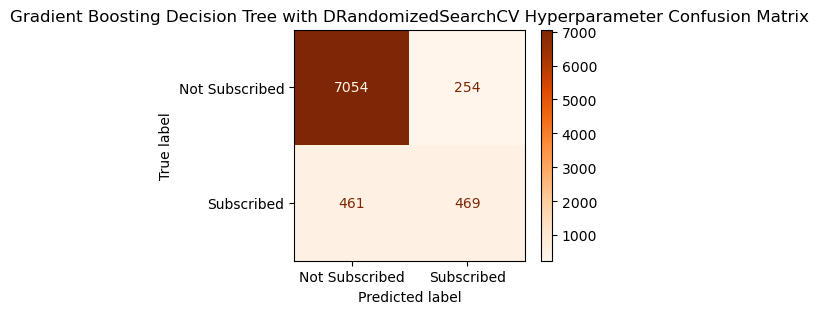

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# If y_test and y_pred are already 1D arrays of labels, use them directly
y_test_labels = y_test  # Assuming these are label-encoded
y_pred_labels = y_pred  # Assuming these are label-encoded

# Compute the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=[0, 1])
fig, ax = plt.subplots(figsize=(4, 3)) 

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Subscribed', 'Subscribed'])
disp.plot(cmap=plt.cm.Oranges, ax=ax)
plt.title("Gradient Boosting Decision Tree with DRandomizedSearchCV Hyperparameter Confusion Matrix")
plt.show()

#### <div style="color: green;"> 2. Random Forest Classifier Model for DRandomizedSearchCV Hyperparameter:</div>

In [45]:
rf = RandomForestClassifier()

rf_random_search = RandomizedSearchCV(
    rf, param_distributions=RF_params, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1
)

In [46]:
rf_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=42, verbose=2)

In [47]:
rf_random_search.best_params_

{'n_estimators': 40,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': True}

#### <div style="color: green;"> Evaluate Random Forest Classifier Model for DRandomizedSearchCV Hyperparameter:</div>

In [48]:
y_pred= rf_random_search.predict(x_test)

train_accuracy_rf_RSH = rf_random_search.score(x_train,y_train)
test_accuracy_rf_RSH= rf_random_search.score(x_test, y_test)
accuracy_score_rf_RSH = accuracy_score(y_test, y_pred)
precision_score_rf_RSH = precision_score(y_test, y_pred, average='weighted')
recall_score_rf_RSH = recall_score(y_test, y_pred, average='weighted')
f1_score_rf_RSH= f1_score(y_test, y_pred, average='weighted')

print(colored('Random Forest Classifier Model for DRandomizedSearchCV Hyperparameter Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_rf_RSH,4)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_rf_RSH,4)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_rf_RSH,4)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_rf_RSH,4)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_rf_RSH,4)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_rf_RSH,4)}',color='light_magenta'))

Random Forest Classifier Model for DRandomizedSearchCV Hyperparameter Evaluation:

train_accuracy : 0.9394
test_accuracy : 0.9118
accuracy_score : 0.9118
precision_score : 0.9028
recall_score : 0.9118
f1_score : 0.9054


#### <div style="color: green;"> Confusion Matrix for  Random Forest Classifier Model with DRandomizedSearchCV Hyperparameter:</div>

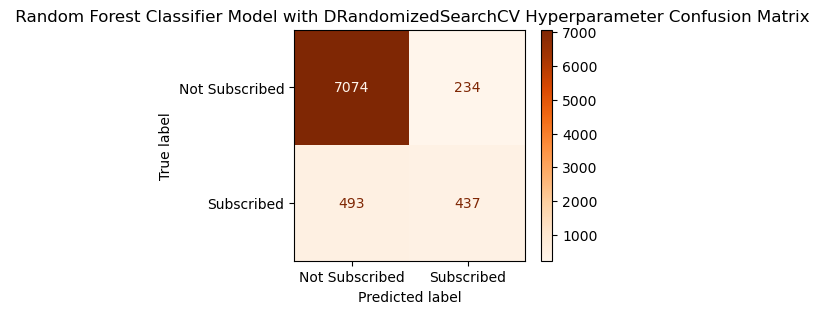

In [49]:
# If y_test and y_pred are already 1D arrays of labels, use them directly
y_test_labels = y_test  # Assuming these are label-encoded
y_pred_labels = y_pred  # Assuming these are label-encoded

# Compute the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=[0, 1])
fig, ax = plt.subplots(figsize=(4, 3)) 

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Subscribed', 'Subscribed'])
disp.plot(cmap=plt.cm.Oranges, ax=ax)
plt.title(" Random Forest Classifier Model with DRandomizedSearchCV Hyperparameter Confusion Matrix")
plt.show()

#### <div style="color: green;"> 3. Decision Tree Classifier Model for DRandomizedSearchCV Hyperparameter:</div>

In [50]:
dtc = DecisionTreeClassifier()

dtc_random_search = RandomizedSearchCV(
    estimator=dtc,
    param_distributions=DT_params,
    n_iter=100,  
    scoring='accuracy',  
    cv=5,  
    verbose=2,
    random_state=42,
    n_jobs=-1 
)

In [51]:
dtc_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': [None, 10, 20, 30],
                                        'min_impurity_decrease': [0.0, 0.1,
                                                                  0.2],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 10, 20],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy', verbose=2)

In [52]:
dtc_random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': 20,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': None}

#### <div style="color: green;"> Evaluate Decision Tree Classifier Model for DRandomizedSearchCV Hyperparameter:</div>

In [53]:
y_pred= dtc_random_search.predict(x_test)

train_accuracy_dtc_RSH = dtc_random_search.score(x_train,y_train)
test_accuracy_dtc_RSH= dtc_random_search.score(x_test, y_test)
accuracy_score_dtc_RSH = accuracy_score(y_test, y_pred)
precision_score_dtc_RSH = precision_score(y_test, y_pred, average='weighted')
recall_score_dtc_RSH = recall_score(y_test, y_pred, average='weighted')
f1_score_dtc_RSH= f1_score(y_test, y_pred, average='weighted')

print(colored('Decision Tree Classifier Model for DRandomizedSearchCV Hyperparameter Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_dtc_RSH,4)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_dtc_RSH,4)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_dtc_RSH,4)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_dtc_RSH,4)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_dtc_RSH,4)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_dtc_RSH,4)}',color='light_magenta'))

Decision Tree Classifier Model for DRandomizedSearchCV Hyperparameter Evaluation:

train_accuracy : 0.9129
test_accuracy : 0.9103
accuracy_score : 0.9103
precision_score : 0.8995
recall_score : 0.9103
f1_score : 0.9018


#### <div style="color: green;"> Confusion Matrix for  Decision Tree Classifier Model with DRandomizedSearchCV Hyperparameter:</div>

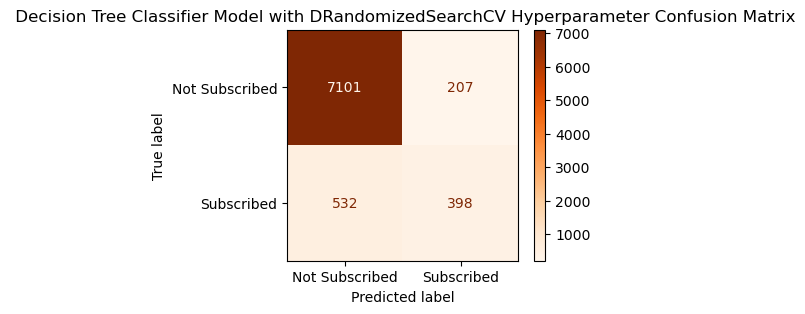

In [54]:
# If y_test and y_pred are already 1D arrays of labels, use them directly
y_test_labels = y_test  # Assuming these are label-encoded
y_pred_labels = y_pred  # Assuming these are label-encoded

# Compute the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=[0, 1])
fig, ax = plt.subplots(figsize=(4, 3)) 

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Subscribed', 'Subscribed'])
disp.plot(cmap=plt.cm.Oranges, ax=ax)
plt.title(" Decision Tree Classifier Model with DRandomizedSearchCV Hyperparameter Confusion Matrix")
plt.show()

#### <div style="color: green;"> 4. Logistic Regression Model for DRandomizedSearchCV Hyperparameter:</div>

In [55]:
lrc = LogisticRegression()

lrc_random_search = RandomizedSearchCV(
    estimator=lrc,
    param_distributions=LR_params,
    n_iter=50,             
    cv=5,                 
    verbose=1,             
    random_state=42,      
    n_jobs=-1             
)

In [56]:
lrc_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026CA48AA1D0>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026CA48AA310>,
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, verbose=1)

In [57]:
lrc_random_search.best_params_

{'C': 0.32313292455558584,
 'l1_ratio': 0.8422847745949985,
 'max_iter': 400,
 'penalty': 'l2',
 'solver': 'saga'}

#### <div style="color: green;"> Evaluate Logistic Regression Model for DRandomizedSearchCV Hyperparameter:</div>

In [58]:
y_pred= lrc_random_search.predict(x_test)

train_accuracy_lrc_RSH = lrc_random_search.score(x_train,y_train)
test_accuracy_lrc_RSH= lrc_random_search.score(x_test, y_test)
accuracy_score_lrc_RSH = accuracy_score(y_test, y_pred)
precision_score_lrc_RSH = precision_score(y_test, y_pred, average='weighted')
recall_score_lrc_RSH = recall_score(y_test, y_pred, average='weighted')
f1_score_lrc_RSH= f1_score(y_test, y_pred, average='weighted')

print(colored('Logistic Regression Model for DRandomizedSearchCV Hyperparameter Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_lrc_RSH,4)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_lrc_RSH,4)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_lrc_RSH,4)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_lrc_RSH,4)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_lrc_RSH,4)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_lrc_RSH,4)}',color='light_magenta'))

Logistic Regression Model for DRandomizedSearchCV Hyperparameter Evaluation:

train_accuracy : 0.9111
test_accuracy : 0.9097
accuracy_score : 0.9097
precision_score : 0.898
recall_score : 0.9097
f1_score : 0.8997


#### <div style="color: green;"> Confusion Matrix for  Logistic Regression Model with DRandomizedSearchCV Hyperparameter:</div>

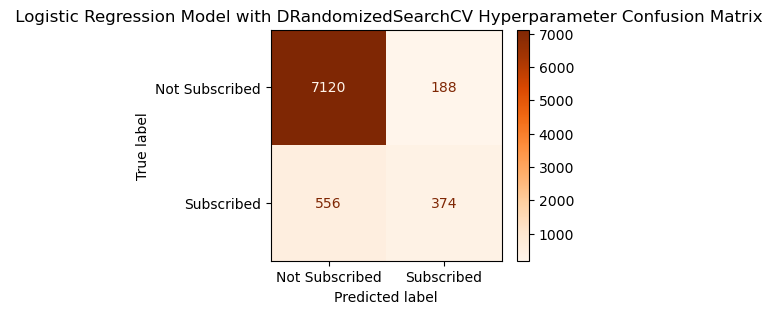

In [59]:
# If y_test and y_pred are already 1D arrays of labels, use them directly
y_test_labels = y_test  # Assuming these are label-encoded
y_pred_labels = y_pred  # Assuming these are label-encoded

# Compute the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=[0, 1])
fig, ax = plt.subplots(figsize=(4, 3)) 

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Subscribed', 'Subscribed'])
disp.plot(cmap=plt.cm.Oranges, ax=ax)
plt.title(" Logistic Regression Model with DRandomizedSearchCV Hyperparameter Confusion Matrix")
plt.show()

#### <div style="color: green;"> Observations:</div>

- Perform DRandomizedSearchCV Hyperparameter, I see that it gives quite better accuracy in all GBDT, Random Forest, Decision Tree and Logistic Regression Model.

### <div style="color: gray;">Step 5: Model Evaluation:-</div>

#### <div style="color: green;"> Compare the performance of different models:</div>

In [60]:
#Create a table to compare different models
d = {
    'model' : ['GBDT with Random Search Hyperparameter',
               'RF with Random Search Hyperparameter',
               'DT with Random Search Hyperparameter',
               'LR with Random Search Hyperparameter'],  
    
    'train accuracy': [train_accuracy_gbdt_RSH,train_accuracy_rf_RSH,train_accuracy_dtc_RSH,train_accuracy_lrc_RSH],
    'test accuracy': [test_accuracy_gbdt_RSH,test_accuracy_rf_RSH,test_accuracy_dtc_RSH,test_accuracy_lrc_RSH],
    'accuracy score': [accuracy_score_gbdt_RSH,accuracy_score_rf_RSH,accuracy_score_dtc_RSH,accuracy_score_lrc_RSH],
    'precision score': [precision_score_gbdt_RSH,precision_score_rf_RSH,precision_score_dtc_RSH,precision_score_lrc_RSH],
    'recall score': [recall_score_gbdt_RSH,recall_score_rf_RSH,recall_score_dtc_RSH,recall_score_lrc_RSH],
    'f1_score': [f1_score_gbdt_RSH,f1_score_rf_RSH,f1_score_dtc_RSH,f1_score_lrc_RSH],  
}


d = pd.DataFrame(d)

d['train accuracy'] = d['train accuracy'].round(4)
d['test accuracy'] = d['test accuracy'].round(4)
d['accuracy score'] = d['accuracy score'].round(4)
d['precision score'] = d['precision score'].round(4)
d['recall score'] = d['recall score'].round(4)
d['f1_score'] = d['f1_score'].round(4)

d

,model,train accuracy,test accuracy,accuracy score,precision score,recall score,f1_score
0,GBDT with Random Search Hyperparameter,0.9296,0.9132,0.9132,0.9059,0.9132,0.9084
1,RF with Random Search Hyperparameter,0.9394,0.9118,0.9118,0.9028,0.9118,0.9054
2,DT with Random Search Hyperparameter,0.9129,0.9103,0.9103,0.8995,0.9103,0.9018
3,LR with Random Search Hyperparameter,0.9111,0.9097,0.9097,0.8980,0.9097,0.8997


#### <div style="color: green;"> Visualize performance with histogram:</div>

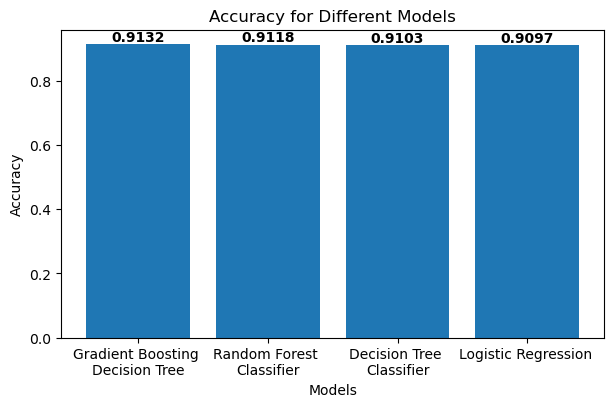

In [61]:
#visualize performance in histogram
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(7, 4))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom', color='black', fontweight='bold')
    plt.show()

accuracy_values = [accuracy_score_gbdt_RSH,accuracy_score_rf_RSH,accuracy_score_dtc_RSH,accuracy_score_lrc_RSH]
model_names = ['Gradient Boosting \nDecision Tree', 'Random Forest \nClassifier', 
               'Decision Tree \nClassifier', 'Logistic Regression ']
plot_histogram(accuracy_values, model_names, 'Accuracy')

### <div style="color: gray;">Step 6: Comparative Analysis-</div>

#### <div style="color: green;">Summary:</div>

- **Hyperparameter Tuning:** The models shown are the result of a random search hyperparameter tuning process, as indicated by the "with Random Search Hyperparameter" in the model names.

- **Top Performing Model:** **Gradient Boosting Decision Tree (GBDT)** with Random Search Hyperparameter tuning is the best-performing model, with the highest train accuracy (0.9296), test accuracy (0.9132), and F1 score (0.9084).

- **Consistent Performance:** The top 4 models **(GBDT, Random Forest, Decision Tree, and Logistic Regression)** all show very similar test accuracies and F1 scores, indicating they are performing comparably well.

- **Precision vs. Recall Trade-off:** The models generally have higher precision scores than recall scores, suggesting they are more conservative in their positive predictions.

- **Histogram Visualization:** The provided histogram visualization shows the distribution of the performance metrics (accuracy, precision, recall, and F1 score) across the 4 tuned models.

- **Tight Clustering:** The histogram bars are tightly clustered, further emphasizing the similar performance of the top models.

- **Potential Overfitting:** The high train accuracies (around 0.93-0.98) compared to test accuracies (around 0.91) could indicate some degree of overfitting, which should be investigated further.

- **Hyperparameter Tuning Effectiveness:** The random search hyperparameter tuning process appears to have been effective in finding well-performing models for this classification task.

Overall, the results suggest that the **GBDT model with tuned hyperparameters** is the best-performing option, but the other top models also show promising and comparable performance. Further analysis of the dataset, model generalization, and potential for ensemble methods could help refine the final model selection.